# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
geophysical_data = data[data['Disaster Subgroup'] == 'Geophysical']

# count number of disasters in each year for each subgroup
geophysical_disaster_counts = geophysical_data['Year'].value_counts().sort_index()

# save index of years
geophysical_disaster_counts_index = geophysical_disaster_counts.index

# sum costs by year
geophysical_costs = geophysical_data[['Year', 'Total Damages']]
geophysical_costs = geophysical_costs.groupby('Year').sum()
geophysical_costs = geophysical_costs.squeeze()

# SPLIT GEOPHYSICAL DISASTERS

In [4]:
# display unique types
for dtype in geophysical_data['Disaster Type'].unique():
    print(dtype)

Earthquake
Volcanic activity


In [5]:
# create new dataframes for each type
earthquake_data = geophysical_data[geophysical_data['Disaster Type'] == 'Earthquake']
volcanic_data = geophysical_data[geophysical_data['Disaster Type'] == 'Volcanic activity']

# count number of disasters in each year for each subgroup
earthquake_disaster_counts = earthquake_data['Year'].value_counts().sort_index()
volcanic_disaster_counts = volcanic_data['Year'].value_counts()
volcanic_disaster_counts[2016] = 0
volcanic_disaster_counts = volcanic_disaster_counts.sort_index()
# save index of years
earthquake_disaster_counts_index = earthquake_disaster_counts.index
volcanic_disaster_counts_index = volcanic_disaster_counts.index

# PLOT GEOPHYSICAL DISASTERS

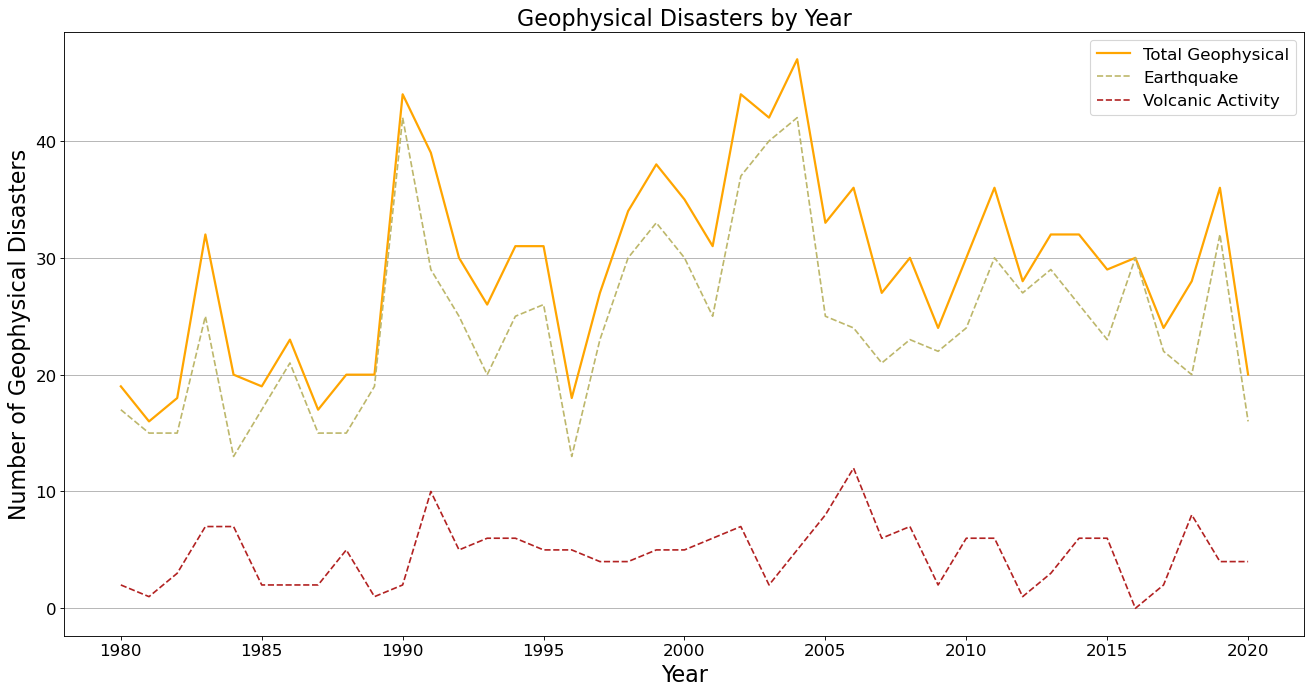

In [6]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Geophysical Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Geophysical Disasters")
plt.plot(geophysical_disaster_counts_index,geophysical_disaster_counts, linewidth=2, color = 'orange')
plt.plot(earthquake_disaster_counts_index, earthquake_disaster_counts, linestyle = '--', color = 'darkkhaki')
plt.plot(volcanic_disaster_counts_index, volcanic_disaster_counts, linestyle = '--', color = 'firebrick')

plt.legend(['Total Geophysical', 'Earthquake', 'Volcanic Activity'])

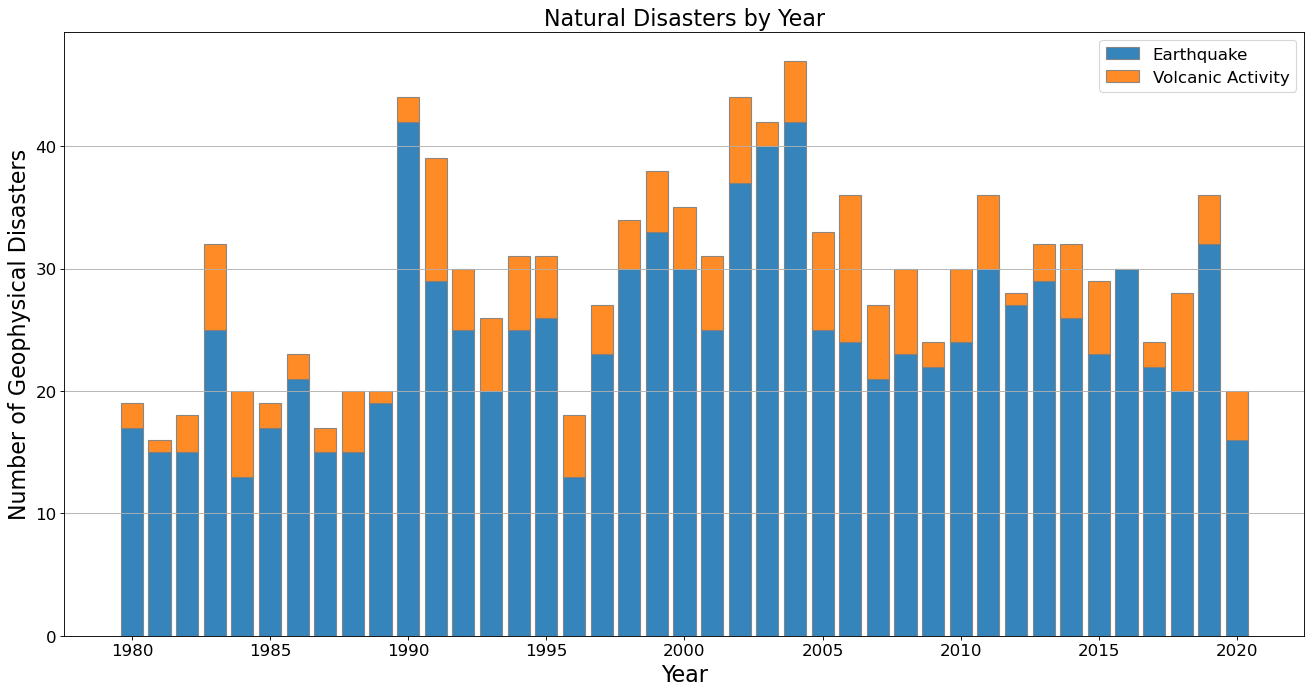

In [7]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Geophysical Disasters")

plt.bar(earthquake_disaster_counts_index, earthquake_disaster_counts, edgecolor = 'grey', alpha = 0.9)
plt.bar(volcanic_disaster_counts_index, volcanic_disaster_counts, bottom = earthquake_disaster_counts, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Earthquake', 'Volcanic Activity'])

# BOXPLOT GEOPHYSICAL DISASTERS BY DECADE

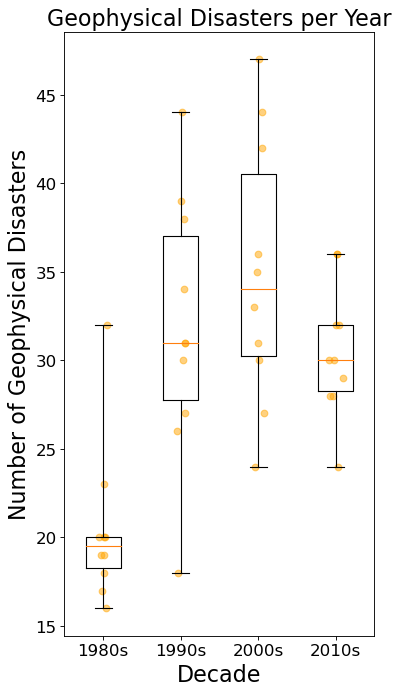

In [8]:
total_box_data = [geophysical_disaster_counts[0:10], geophysical_disaster_counts[10:20], geophysical_disaster_counts[20:30], geophysical_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Geophysical Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Geophysical Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE GEOPHYSICAL DISASTER OCCURANCES

In [9]:
# total geophysical change 1980-2020
geophysical_disasters_1980 = geophysical_disaster_counts[1980]
geophysical_disasters_2020 = geophysical_disaster_counts[2020]
geophysical_percent_change_1980_to_2020 = 100*(geophysical_disasters_2020-geophysical_disasters_1980)/geophysical_disasters_1980
print("Geophysical Disaster Change (1980-2020): {:.2f}%".format(geophysical_percent_change_1980_to_2020))

# earthquake change 1980-2020
earthquakes_1980 = earthquake_disaster_counts[1980]
earthquakes_2020 = earthquake_disaster_counts[2020]
percent_change_earthquake_1980_to_2020 = 100*(earthquakes_2020-earthquakes_1980)/earthquakes_1980
print("Earthquake Disaster Change (1980-2020): {:.2f}%".format(percent_change_earthquake_1980_to_2020))

# volcanic change 1980-2020
volcanic_1980 = volcanic_disaster_counts[1980]
volcanic_2020 = volcanic_disaster_counts[2020]
percent_change_volcanic_1980_to_2020 = 100*(volcanic_2020-volcanic_1980)/volcanic_1980
print("Volcanic Disaster Change (1980-2020): {:.2f}%".format(percent_change_volcanic_1980_to_2020))

# total geophysical statistical data
print("\nGeophysical Statistical Data: ")
print(geophysical_disaster_counts.describe())

# 1980s geophysical statistical data
print("\n1980s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[0:10].describe())

# 1990s geophysical statistical data
print("\n1990s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[10:20].describe())

# 2000s geophysical statistical data
print("\n2000s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[20:30].describe())

# 2010s geophysical statistical data
print("\n2010s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[30:40].describe())

print("\n")

# geophysical statistical changes 1980s-2010s
geophysical_mean_1980s = geophysical_disaster_counts[0:10].mean()
geophysical_mean_2010s = geophysical_disaster_counts[30:40].mean()
mean_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_2010s-geophysical_mean_1980s)/geophysical_mean_1980s
print("Mean Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_geophysical_1980_to_2020))

geophysical_max_1980s = geophysical_disaster_counts[0:10].max()
geophysical_max_2010s = geophysical_disaster_counts[30:40].max()
max_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_2010s-geophysical_max_1980s)/geophysical_max_1980s
print("Max Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_geophysical_1980_to_2020))

geophysical_min_1980s = geophysical_disaster_counts[0:10].min()
geophysical_min_2010s = geophysical_disaster_counts[30:40].min()
min_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_2010s-geophysical_min_1980s)/geophysical_min_1980s
print("Min Geophysical Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_geophysical_1980_to_2020))

# earthquake statistical changes 1980s-2010s
earthquake_mean_1980s = earthquake_disaster_counts[0:10].mean()
earthquake_mean_2010s = earthquake_disaster_counts[30:40].mean()
mean_percent_change_earthquake_1980_to_2020 = 100*(earthquake_mean_2010s-earthquake_mean_1980s)/earthquake_mean_1980s
print("Mean Earthquake Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_earthquake_1980_to_2020))

earthquake_max_1980s = earthquake_disaster_counts[0:10].max()
earthquake_max_2010s = earthquake_disaster_counts[30:40].max()
max_percent_change_earthquake_1980_to_2020 = 100*(geophysical_max_2010s-geophysical_max_1980s)/geophysical_max_1980s
print("Max Earthquake Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_geophysical_1980_to_2020))

earthquake_min_1980s = earthquake_disaster_counts[0:10].min()
earthquake_min_2010s = earthquake_disaster_counts[30:40].min()
min_percent_change_earthquake_1980_to_2020 = 100*(geophysical_min_2010s-geophysical_min_1980s)/geophysical_min_1980s
print("Min Earthquake Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_geophysical_1980_to_2020))

# volcanic statistical changes 1980s-2010s
volcanic_mean_1980s = volcanic_disaster_counts[0:10].mean()
volcanic_mean_2010s = volcanic_disaster_counts[30:40].mean()
mean_percent_change_volcanic_1980_to_2020 = 100*(volcanic_mean_2010s-volcanic_mean_1980s)/volcanic_mean_1980s
print("Mean Volcanic Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_volcanic_1980_to_2020))

volcanic_max_1980s = volcanic_disaster_counts[0:10].max()
volcanic_max_2010s = volcanic_disaster_counts[30:40].max()
max_percent_change_volcanic_1980_to_2020 = 100*(volcanic_max_2010s-volcanic_max_1980s)/volcanic_max_1980s
print("Max Volcanic Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_volcanic_1980_to_2020))

volcanic_min_1980s = volcanic_disaster_counts[0:10].min()
volcanic_min_2010s = volcanic_disaster_counts[30:40].min()
min_percent_change_volcanic_1980_to_2020 = 100*(volcanic_min_2010s-volcanic_min_1980s)/volcanic_min_1980s
print("Min Volcanic Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_volcanic_1980_to_2020))

Geophysical Disaster Change (1980-2020): 5.26%
Earthquake Disaster Change (1980-2020): -5.88%
Volcanic Disaster Change (1980-2020): 100.00%

Geophysical Statistical Data: 
count    41.000000
mean     29.170732
std       8.021541
min      16.000000
25%      23.000000
50%      30.000000
75%      34.000000
max      47.000000
Name: Year, dtype: float64

1980s Geophysical Statistical Data: 
count    10.000000
mean     20.400000
std       4.501851
min      16.000000
25%      18.250000
50%      19.500000
75%      20.000000
max      32.000000
Name: Year, dtype: float64

1990s Geophysical Statistical Data: 
count    10.000000
mean     31.800000
std       7.420692
min      18.000000
25%      27.750000
50%      31.000000
75%      37.000000
max      44.000000
Name: Year, dtype: float64

2000s Geophysical Statistical Data: 
count    10.000000
mean     34.900000
std       7.489993
min      24.000000
25%      30.250000
50%      34.000000
75%      40.500000
max      47.000000
Name: Year, dtype: float6

# GEOPHYSICAL DISASTER COSTS

In [10]:
earthquake_costs = earthquake_data[['Year', 'Total Damages']]
earthquake_costs = earthquake_costs.groupby('Year').sum()
earthquake_costs = earthquake_costs.squeeze()

volcanic_costs = volcanic_data[['Year', 'Total Damages']]
volcanic_costs = volcanic_costs.groupby('Year').sum()
volcanic_costs = volcanic_costs.squeeze()
volcanic_costs[2016] = 0
volcanic_costs = volcanic_costs.sort_index()

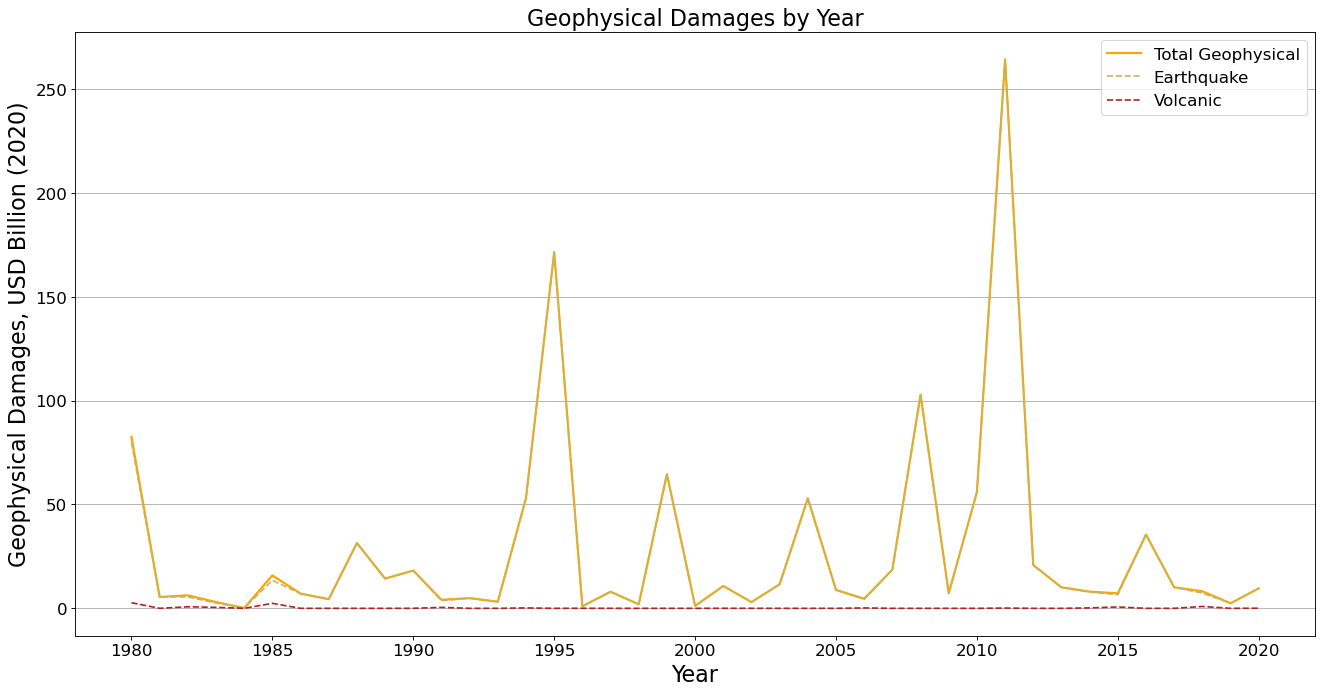

In [11]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Geophysical Damages by Year")
plt.xlabel("Year")
plt.ylabel("Geophysical Damages, USD Billion (2020)")
plt.plot(geophysical_costs.index, geophysical_costs, linewidth=2, color = 'orange')
plt.plot(earthquake_costs.index, earthquake_costs, linestyle = '--', color = 'darkkhaki')
plt.plot(volcanic_costs.index, volcanic_costs, linestyle = '--', color = 'firebrick')

plt.legend(['Total Geophysical', 'Earthquake', 'Volcanic'])

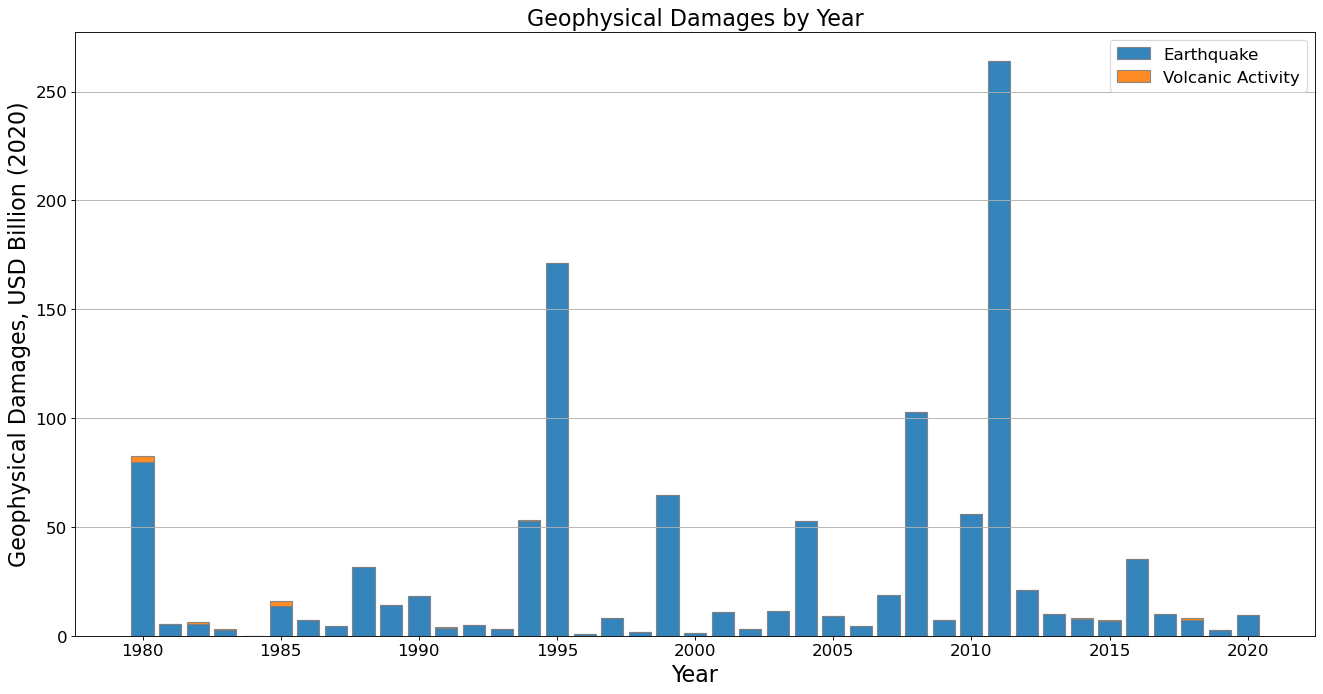

In [12]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Geophysical Damages by Year")
plt.xlabel("Year")
plt.ylabel("Geophysical Damages, USD Billion (2020)")

plt.bar(earthquake_costs.index, earthquake_costs, edgecolor = 'grey', alpha = 0.9)
plt.bar(volcanic_costs.index, volcanic_costs, bottom = earthquake_costs, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Earthquake', 'Volcanic Activity'])

# BOXPLOT CLIMATOLOGICAL DAMAGES BY DECADE

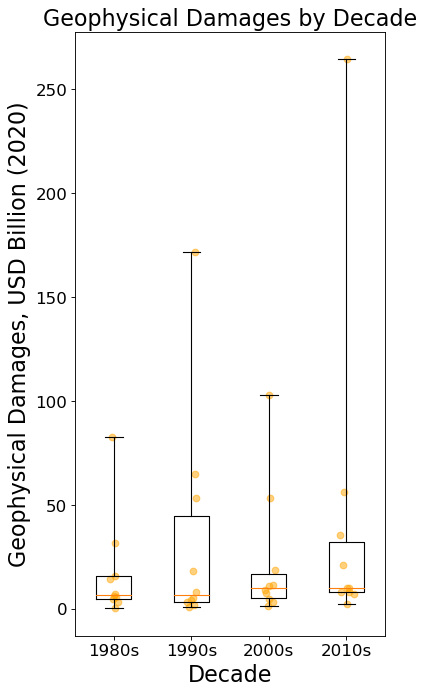

In [13]:
geophysical_box_data = [geophysical_costs[0:10], geophysical_costs[10:20], geophysical_costs[20:30], geophysical_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Geophysical Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Geophysical Damages, USD Billion (2020)")

plt.boxplot(geophysical_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,geophysical_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,geophysical_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,geophysical_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,geophysical_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE DISASTER COSTS

In [14]:
# total geophysical cost change 1980-2020
geophysical_costs_1980 = geophysical_costs[1980]
geophysical_costs_2020 = geophysical_costs[2020]
cost_percent_change_geophysical_1980_to_2020 = 100*(geophysical_costs_2020-geophysical_costs_1980)/geophysical_costs_1980
print("Geophysical Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_geophysical_1980_to_2020))

# earthquake cost change 1980-2020
earthquake_costs_1980 = earthquake_costs[1980]
earthquake_costs_2020 = earthquake_costs[2020]
cost_percent_change_earthquake_1980_to_2020 = 100*(earthquake_costs_2020-earthquake_costs_1980)/earthquake_costs_1980
print("Earthquake Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_earthquake_1980_to_2020))

# volcanic cost change 1980-2020
volcanics_costs_1980 = volcanic_costs[1980]
volcanics_costs_2020 = volcanic_costs[2020]
cost_percent_change_volcanic_1980_to_2020 = 100*(volcanics_costs_2020-volcanics_costs_1980)/volcanics_costs_1980
print("Volcanic Disaster Change (1980-2020): {:.2f}%".format(cost_percent_change_volcanic_1980_to_2020))

# total geophysical cost statistical data
print("\nTotal Geophysical Cost Statistical Data: ")
print(geophysical_costs.describe())

# 1980s geophysical cost statistical data
print("\n1980s Geophysical Cost Statistical Data: ")
print(geophysical_costs[0:10].describe())

# 1990s geophysical cost statistical data
print("\n1990s Geophysical Cost Statistical Data: ")
print(geophysical_costs[10:20].describe())

# 2000s geophysical cost statistical data
print("\n2000s Geophysical Cost Statistical Data: ")
print(geophysical_costs[20:30].describe())

# 2010s geophysical cost statistical data
print("\n2010s Geophysical Cost Statistical Data: ")
print(geophysical_costs[30:40].describe())

print("\n")

# geophysical costs statistical changes 1980s-2010s
geophysical_mean_costs_1980s = geophysical_costs[0:10].mean()
geophysical_mean_costs_2010s = geophysical_costs[30:40].mean()
mean_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_costs_2010s-geophysical_mean_costs_1980s)/geophysical_mean_costs_1980s
print("Mean Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_geophysical_1980_to_2020))

geophysical_max_costs_1980s = geophysical_costs[0:10].max()
geophysical_max_costs_2010s = geophysical_costs[30:40].max()
max_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_costs_2010s-geophysical_max_costs_1980s)/geophysical_max_costs_1980s
print("Max Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_geophysical_1980_to_2020))

geophysical_min_costs_1980s = geophysical_costs[0:10].min()
geophysical_min_costs_2010s = geophysical_costs[30:40].min()
min_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_costs_2010s-geophysical_min_costs_1980s)/geophysical_min_costs_1980s
print("Min Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_geophysical_1980_to_2020))

# earthquake costs statistical changes 1980s-2010s
earthquake_mean_costs_1980s = earthquake_costs[0:10].mean()
earthquake_mean_costs_2010s = earthquake_costs[30:40].mean()
mean_costs_percent_change_earthquake_1980_to_2020 = 100*(earthquake_mean_costs_2010s-earthquake_mean_costs_1980s)/earthquake_mean_costs_1980s
print("Mean Earthquake Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_earthquake_1980_to_2020))

earthquake_max_costs_1980s = earthquake_costs[0:10].max()
earthquake_max_costs_2010s = earthquake_costs[30:40].max()
max_costs_percent_change_earthquake_1980_to_2020 = 100*(earthquake_max_costs_2010s-earthquake_max_costs_1980s)/earthquake_max_costs_1980s
print("Max Earthquake Disaster Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_earthquake_1980_to_2020))

earthquake_min_costs_1980s = earthquake_costs[0:10].min()
earthquake_min_costs_2010s = earthquake_costs[30:40].min()
min_costs_percent_change_earthquake_1980_to_2020 = 100*(earthquake_min_costs_2010s-earthquake_min_costs_1980s)/earthquake_min_costs_1980s
print("Min Earthquake Disaster Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_earthquake_1980_to_2020))

# volcanic costs statistical changes 1980s-2010s
volcanic_mean_costs_1980s = volcanic_costs[0:10].mean()
volcanic_mean_costs_2010s = volcanic_costs[30:40].mean()
mean_costs_percent_change_volcanic_1980_to_2020 = 100*(volcanic_mean_costs_2010s-volcanic_mean_costs_1980s)/volcanic_mean_costs_1980s
print("Mean Volcanic Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_volcanic_1980_to_2020))

volcanic_max_costs_1980s = volcanic_costs[0:10].max()
volcanic_max_costs_2010s = volcanic_costs[30:40].max()
max_costs_percent_change_volcanic_1980_to_2020 = 100*(volcanic_max_costs_2010s-volcanic_max_costs_1980s)/volcanic_max_costs_1980s
print("Max Volcanic Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_volcanic_1980_to_2020))

volcanic_min_costs_1980s = volcanic_costs[0:10].min()
volcanic_min_costs_2010s = volcanic_costs[30:40].min()
min_costs_percent_change_volcanic_1980_to_2020 = 100*(volcanic_min_costs_2010s-volcanic_min_costs_1980s)/volcanic_min_costs_1980s
print("Min Volcanic Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_volcanic_1980_to_2020))

Geophysical Disaster Costs Change (1980-2020): -88.34%
Earthquake Disaster Costs Change (1980-2020): -88.03%
Volcanic Disaster Change (1980-2020): -97.56%

Total Geophysical Cost Statistical Data: 
count     41.000000
mean      28.161210
std       50.500344
min        0.121696
25%        4.583419
50%        8.858584
75%       20.828011
max      264.260624
Name: Total Damages, dtype: float64

1980s Geophysical Cost Statistical Data: 
count    10.000000
mean     17.038030
std      24.704008
min       0.121696
25%       4.664843
50%       6.661707
75%      15.462110
max      82.493915
Name: Total Damages, dtype: float64

1990s Geophysical Cost Statistical Data: 
count     10.000000
mean      33.043633
std       53.679176
min        0.968632
25%        3.394277
50%        6.440068
75%       44.401994
max      171.476938
Name: Total Damages, dtype: float64

2000s Geophysical Cost Statistical Data: 
count     10.000000
mean      22.157442
std       32.018048
min        1.164298
25%        5.

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in double_scalars
